# Pymaceuticals Inc.
---

### Analysis

There is evidence to show that a mouse using Capomulin did see a reduction in size of their tumors. As well, there was a strong correlation between mouse weight and tumor size.
 

In [57]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

df = pd.merge(mouse_df, study_df, on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = ['Mouse ID','Timepoint']
dup_df = df[df.duplicated(subset=duplicates, keep=False)]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup_df = df[df['Mouse ID'] == 'g989']
mouse_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup1 = study_df[study_df['Mouse ID'] != 'g989']
drop_dup2 = mouse_df[mouse_df['Mouse ID'] != 'g989']
cleaned_df = pd.merge(drop_dup1, drop_dup2, on='Mouse ID')
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std'])
summary_stats_df['SEM'] = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats_df = summary_stats_df.rename(columns={'mean':'Regimen Mean','median':'Regimen Median','var':'Variance','std':'Standard Deviation'})
summary_stats_df

,Regimen Mean,Regimen Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

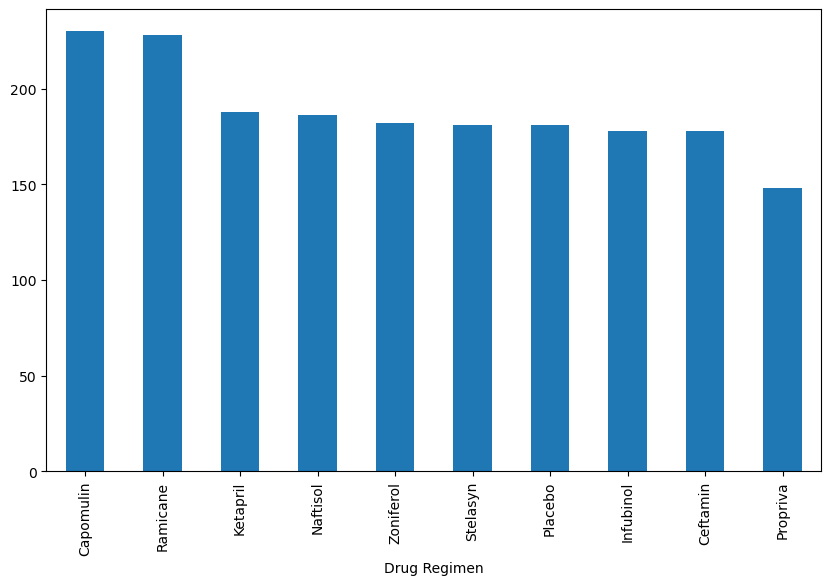

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_graph_dr = cleaned_df['Drug Regimen'].value_counts()
bar_graph_dr.plot(kind="bar", figsize=(10,6))
plt.xlabel('Drug Regimen')
plt.show()

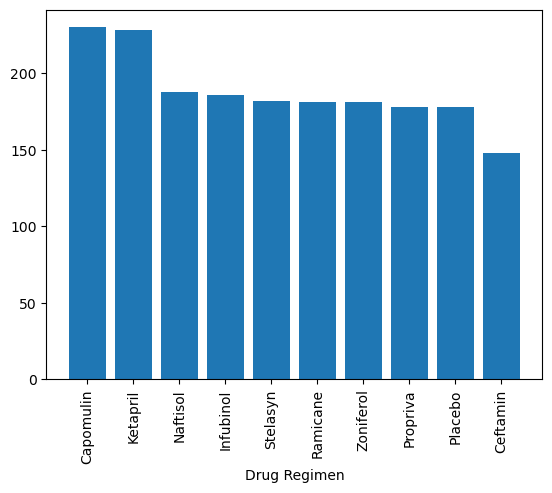

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = cleaned_df['Drug Regimen'].unique()
x_axis = np.arange(len(regimens))
plt.bar(x_axis, cleaned_df['Drug Regimen'].value_counts())
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation=90)
plt.xlabel("Drug Regimen")
plt.show()

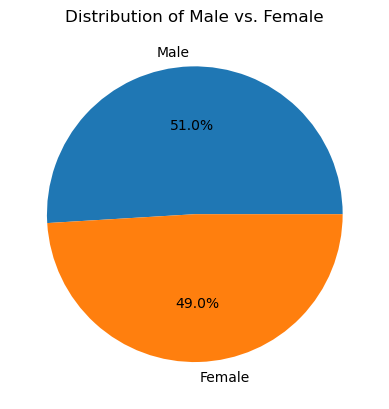

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist = cleaned_df['Sex'].value_counts()
sex_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Male vs. Female')
plt.ylabel('')
plt.show()

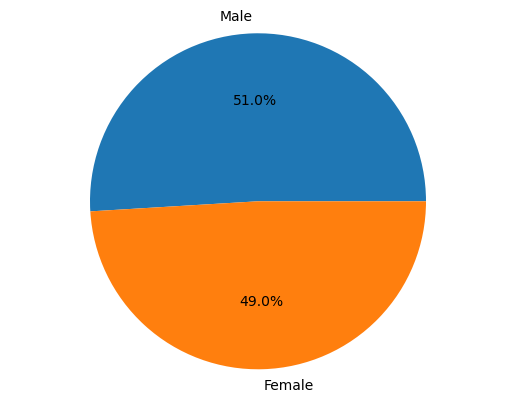

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
titles = ['Male','Female']
plt.pie(sex_dist,labels=titles , autopct="%1.1f%%", startangle=0)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_per_mouse = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this information with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_per_mouse, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the specified treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(specified_regimens)]
final_tumor_volume_df

# Calculate the mean tumor volume for each regimen
mean_tumor_volume_per_regimen = final_tumor_volume_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean_tumor_volume_per_regimen = pd.DataFrame(mean_tumor_volume_per_regimen)
mean_tumor_volume_per_regimen.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mean)'}, inplace=True)
mean_tumor_volume_per_regimen = mean_tumor_volume_per_regimen.reset_index()



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
names = []
for treatments in mean_tumor_volume_per_regimen["Drug Regimen"].unique():
    names.append(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in names:
    treatment_data = merged_df.loc[merged_df['Drug Regimen'] ==treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(treatment_data.tolist())
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    IQR = q3 - q1

    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    num_outliers = len(outliers)
    print(f'\nTreatment: {treatment}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    if num_outliers == 0:
        print('Potential Outliers: 0')
    else:
        print(f'Potential Outliers: {num_outliers}')
        print('Outliers:', outliers.tolist())



Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: 0

Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: 0

Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 1
Outliers: [36.3213458]

Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: 0


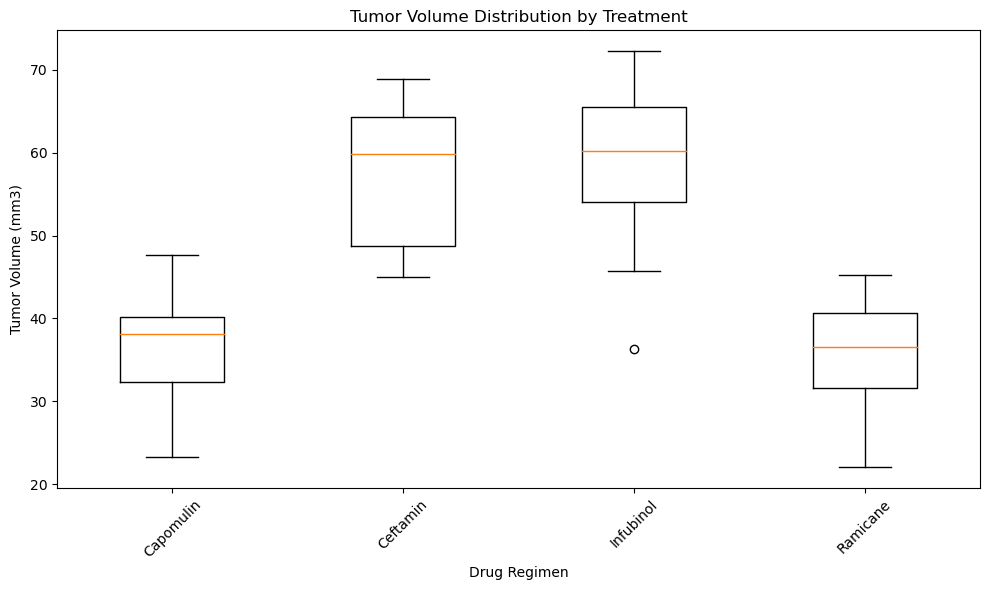

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'].tolist() for treatment in names]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=names)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution by Treatment')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Line and Scatter Plots

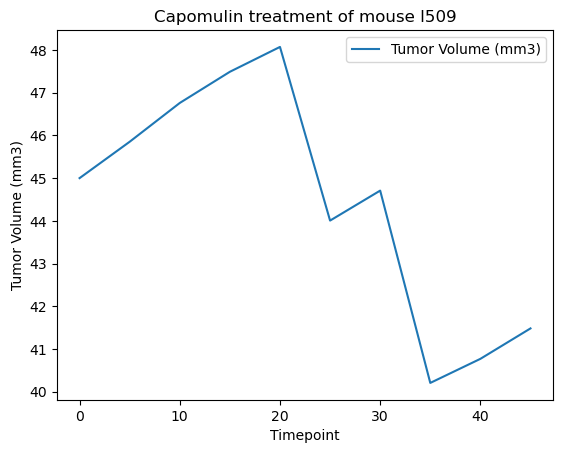

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse = capomulin[capomulin['Mouse ID'] == 'l509']
capomulin_mouse

capomulin_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

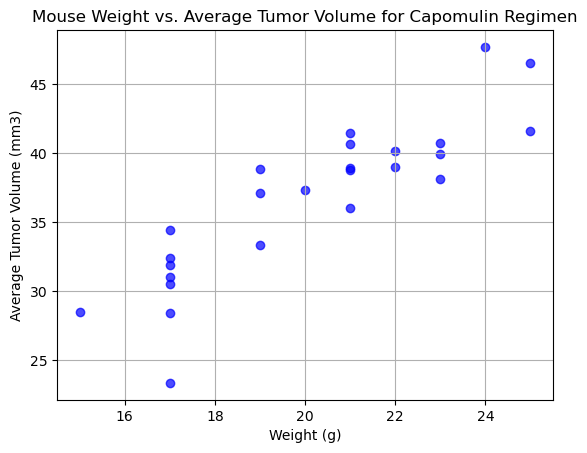

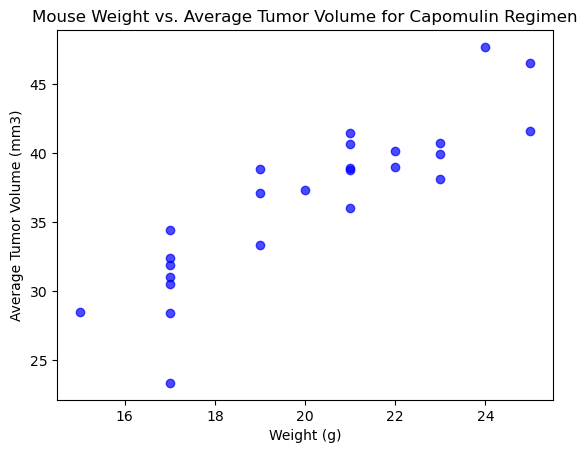

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
mouse_weight_values = mouse_weight.values
average_tumor_volume_values = average_tumor_volume.values

plt.scatter(mouse_weight_values, average_tumor_volume_values, color='blue', alpha=0.7)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8767060403658113


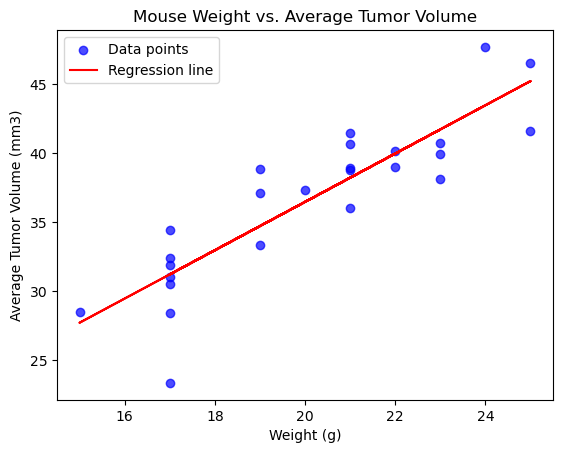

In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = pearsonr(mouse_weight_values, average_tumor_volume_values)
print('Correlation Coefficient:', correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight_values, average_tumor_volume_values)

# Generate the regression line
regression_line = slope * mouse_weight_values + intercept

# Plot the scatter plot and regression line
plt.scatter(mouse_weight_values, average_tumor_volume_values, color='blue', alpha=0.7, label='Data points')
plt.plot(mouse_weight_values, regression_line, color='red', label='Regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.legend()

plt.show()